<a href="https://colab.research.google.com/github/shreyash2610/-A-Fine-Windy-Day-HackerEarth/blob/main/A_Fine_Windy_Day_HackerEarth_Machine_Learning_challenge_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing catboost library

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 41kB/s 


Importing necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import catboost as cb
import xgboost as xgb
import lightgbm as lgbm

Importing required modules

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.ensemble import VotingRegressor

Loading data and checking few samples

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/HackerEarth/A Fine Windy Day/dataset/train.csv')
df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


Deleting unwanted column 'ID'

In [ ]:
del df['tracking_id']
print("Training dataset shape: ",df.shape)

Training dataset shape:  (28200, 21)


Extracting info from time column like year, season, month, etc.

In [ ]:
df['date']=pd.to_datetime(df['datetime'])

In [ ]:
df['year']=df['date'].dt.year
df['quarter'] = pd.DatetimeIndex(df['datetime']).quarter
df['month']=df['date'].dt.month
df['weekofyear']=df['date'].dt.isocalendar().week
df['dayofyear']=pd.DatetimeIndex(df['datetime']).dayofyear
df['day']=df['date'].dt.day
df['hour'] =df['date'].dt.hour
df['min']=df['date'].dt.minute
df['is_month_start']=pd.DatetimeIndex(df['datetime']).is_month_start.astype(int)
df['is_month_end']=pd.DatetimeIndex(df['datetime']).is_month_end.astype(int)

In [ ]:
del df['date']
del df['datetime']

In [ ]:
print("Number of nan values per column: ")
print()
df.isna().sum()

Number of nan values per column: 



wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
year                                 0
quarter                              0
month                                0
weekofyear                           0
dayofyear                            0
day                      

Thats terrible!!!!!!!!!!

We need to get our data right before we move on :(

Ohh wait!!! Aint that the thing generally data scientist does?! Oh yeah, damn right!! Lets get started :)

# **Preprocessing and value imputation using data visualization**

In this ML exmaple, major concern is about dataset since many columns have negative, nan and null values which needs to be replaced or imputed using mean or median(as a starter, for advanced data tweaking, DL libraries for data imputations is being used.) As per this dataset, it has lot of neagtive values in even columns like length or speed!!!!!! So, be careful while playing with it ;)

Also, this is a bit small dataset when compared to real life exmaples, so I preferred to use dummies of pandas library which acts similar to one-hot encoding. So, just use your intution depending on your dataset.



In [ ]:
df['wind_speed(m/s)']=df['wind_speed(m/s)'].abs()

(array([1., 1., 1., ..., 0., 0., 1.]),
 array([  1.76824789,   2.06809161,   2.36793532, ..., 600.85598294,
        601.15582665, 601.45567036]),
 <a list of 2000 Patch objects>)

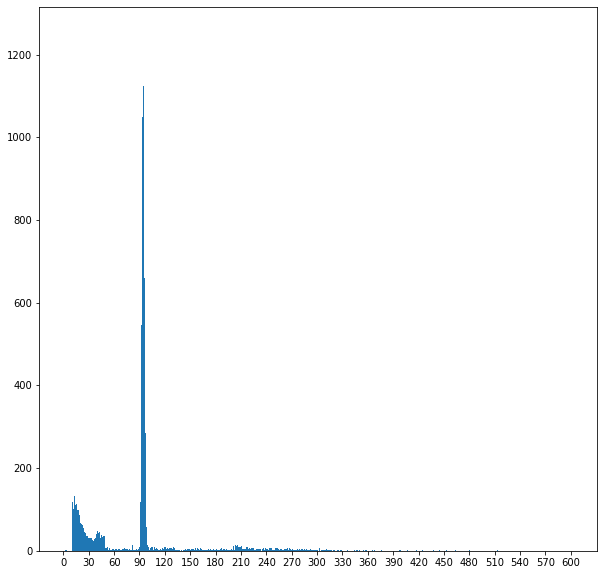

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(0, 620,30)
plt.xticks(x_ticks)
plt.hist(df['wind_speed(m/s)'],bins=2000)

In [ ]:
a=df['wind_speed(m/s)'].median()
df['wind_speed(m/s)']=df['wind_speed(m/s)'].fillna(a)

In [ ]:
df['atmospheric_temperature(°C)']=df['atmospheric_temperature(°C)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-53.79581308, -53.72880645, -53.66179983, ...,  80.08343026,
         80.15043689,  80.21744352]),
 <a list of 2000 Patch objects>)

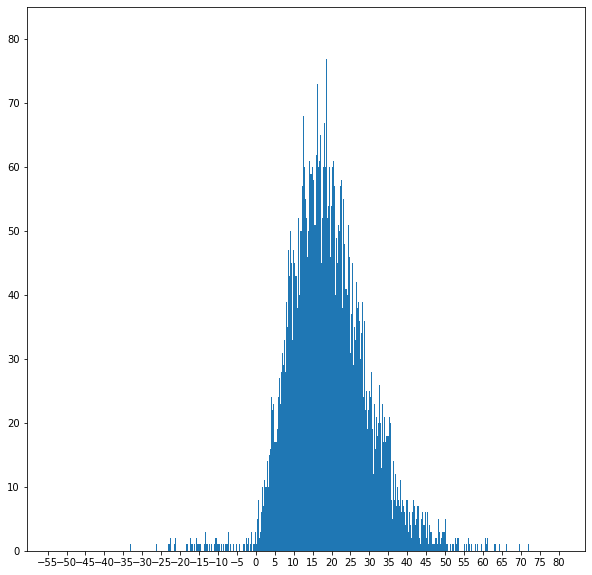

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(-55,85,5)
plt.xticks(x_ticks)
plt.hist(df['atmospheric_temperature(°C)'],bins=2000)

In [ ]:
b=df['atmospheric_temperature(°C)'].mean()
df['atmospheric_temperature(°C)']=df['atmospheric_temperature(°C)'].fillna(b)

In [ ]:
df['shaft_temperature(°C)']=df['shaft_temperature(°C)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-93.08623556, -92.95478222, -92.82332887, ..., 169.55754842,
        169.68900177, 169.82045512]),
 <a list of 2000 Patch objects>)

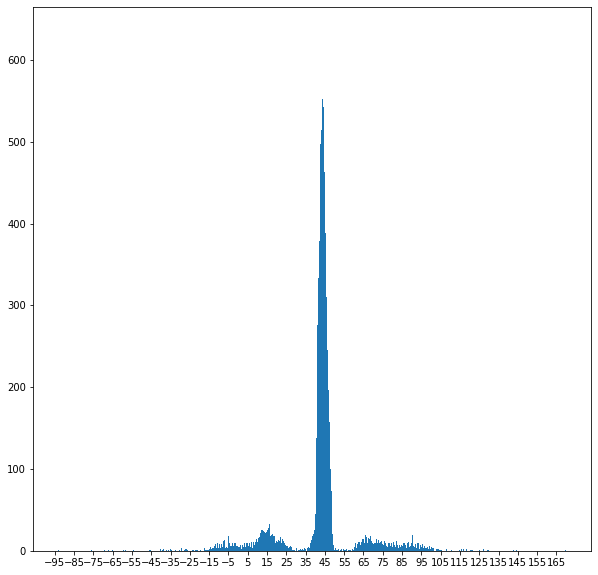

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(-95,170,10)
plt.xticks(x_ticks)
plt.hist(df['shaft_temperature(°C)'],bins=2000)

In [ ]:
c=df['shaft_temperature(°C)'].median()
df['shaft_temperature(°C)']=df['shaft_temperature(°C)'].fillna(c)

In [ ]:
df['blades_angle(°)']=df['blades_angle(°)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-146.2595427 , -146.10344686, -145.94735103, ...,  165.61993156,
         165.77602739,  165.93212323]),
 <a list of 2000 Patch objects>)

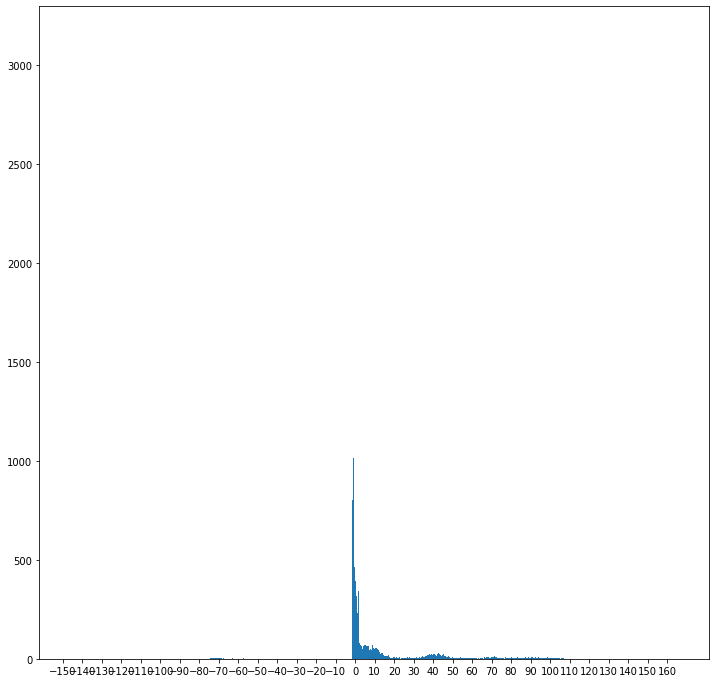

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(-150,170,10)
plt.xticks(x_ticks)
plt.hist(df['blades_angle(°)'],bins=2000)

In [ ]:
d=df['blades_angle(°)'].median()
df['blades_angle(°)']=df['blades_angle(°)'].fillna(d)

In [ ]:
df['gearbox_temperature(°C)']=df['gearbox_temperature(°C)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 3.]),
 array([-244.97409783, -244.35211079, -243.73012374, ...,  997.7560259 ,
         998.37801295,  999.        ]),
 <a list of 2000 Patch objects>)

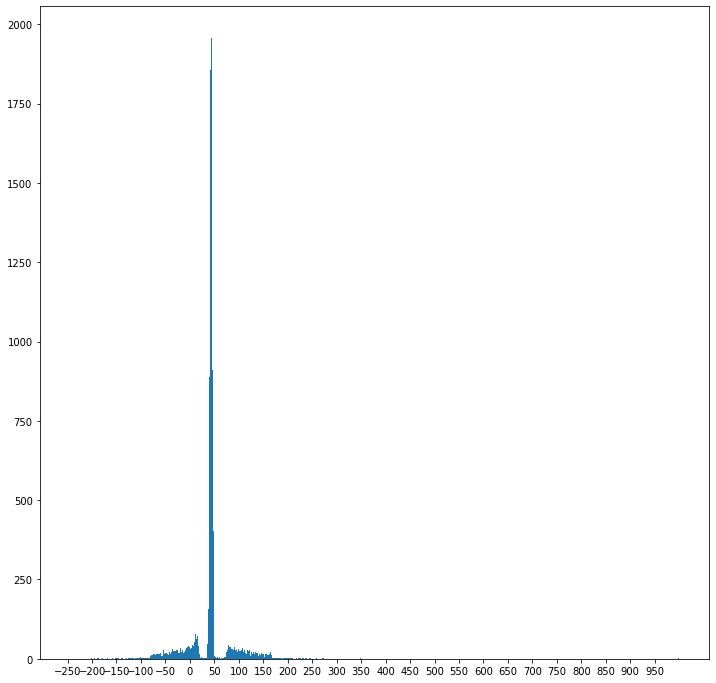

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(-250,1000,50)
plt.xticks(x_ticks)
plt.hist(df['gearbox_temperature(°C)'],bins=2000)

In [ ]:
e=df['gearbox_temperature(°C)'].mean()
df['gearbox_temperature(°C)']=df['gearbox_temperature(°C)'].fillna(e)

(array([1., 0., 0., ..., 1., 0., 1.]),
 array([ 3.16715102,  3.19056745,  3.21398387, ..., 49.95316715,
        49.97658358, 50.        ]),
 <a list of 2000 Patch objects>)

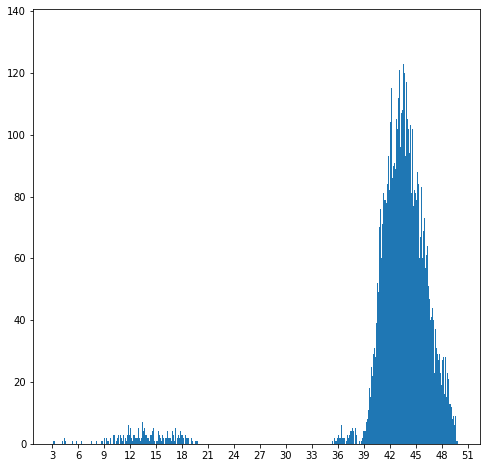

In [ ]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(0,60,3)
plt.xticks(x_ticks)
plt.hist(df['engine_temperature(°C)'],bins=2000)

In [ ]:
f=df['engine_temperature(°C)'].median()
df['engine_temperature(°C)']=df['engine_temperature(°C)'].fillna(f)

(array([375.,  62.,  46., ...,   0.,   0.,   1.]),
 array([ 500.  ,  501.25,  502.5 , ..., 2997.5 , 2998.75, 3000.  ]),
 <a list of 2000 Patch objects>)

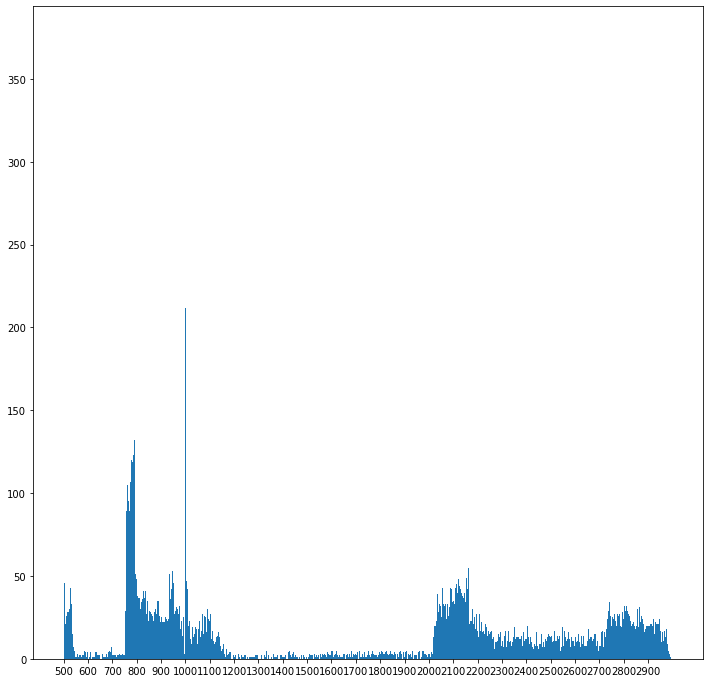

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(500,3000,100)
plt.xticks(x_ticks)
plt.hist(df['motor_torque(N-m)'],bins=2000)

In [ ]:
g=df['motor_torque(N-m)'].median()
df['motor_torque(N-m)']=df['motor_torque(N-m)'].fillna(g)

(array([3., 5., 0., ..., 0., 0., 1.]),
 array([ 33.89377879,  33.9268319 ,  33.95988501, ...,  99.93389378,
         99.96694689, 100.        ]),
 <a list of 2000 Patch objects>)

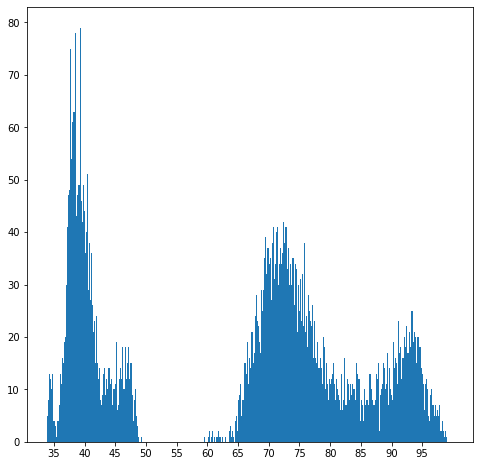

In [ ]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(30,100,5)
plt.xticks(x_ticks)
plt.hist(df['generator_temperature(°C)'],bins=2000)

In [ ]:
h=df['generator_temperature(°C)'].median()
df['generator_temperature(°C)']=df['generator_temperature(°C)'].fillna(h)

In [ ]:
df['atmospheric_pressure(Pascal)']=df['atmospheric_pressure(Pascal)'].abs()

(array([2., 4., 3., ..., 0., 0., 1.]),
 array([2.10912406e+02, 8.47082897e+02, 1.48325339e+03, ...,
        1.27127955e+06, 1.27191572e+06, 1.27255190e+06]),
 <a list of 2000 Patch objects>)

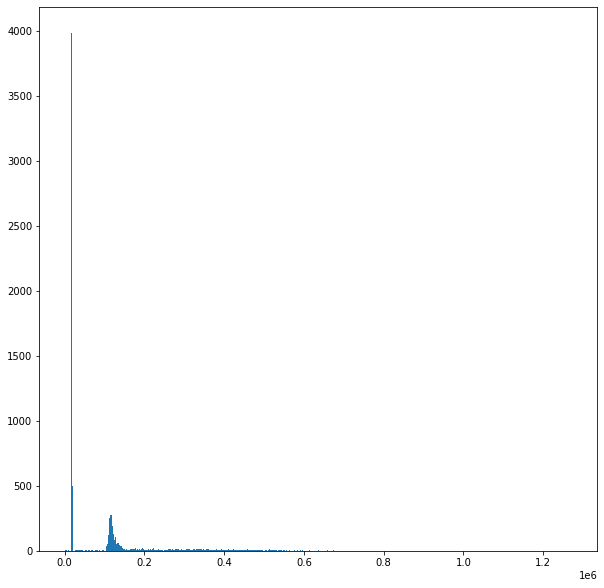

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(df['atmospheric_pressure(Pascal)'],bins=2000)

In [ ]:
i=df['atmospheric_pressure(Pascal)'].mean()
df['atmospheric_pressure(Pascal)']=df['atmospheric_pressure(Pascal)'].fillna(i)

(array([31.,  0.,  0., ...,  0.,  0.,  1.]),
 array([-30.    , -29.9575, -29.915 , ...,  54.915 ,  54.9575,  55.    ]),
 <a list of 2000 Patch objects>)

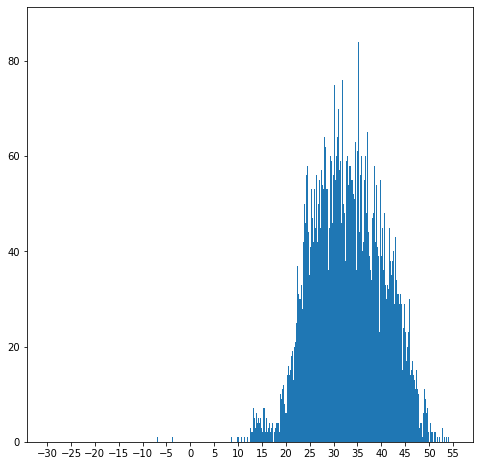

In [ ]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(-40,60,5)
plt.xticks(x_ticks)
plt.hist(df['area_temperature(°C)'],bins=2000)

In [ ]:
df['windmill_body_temperature(°C)']=df['windmill_body_temperature(°C)'].replace(-99,np.nan)

(array([3., 0., 0., ..., 0., 0., 1.]),
 array([-999.   , -998.339, -997.678, ...,  321.678,  322.339,  323.   ]),
 <a list of 2000 Patch objects>)

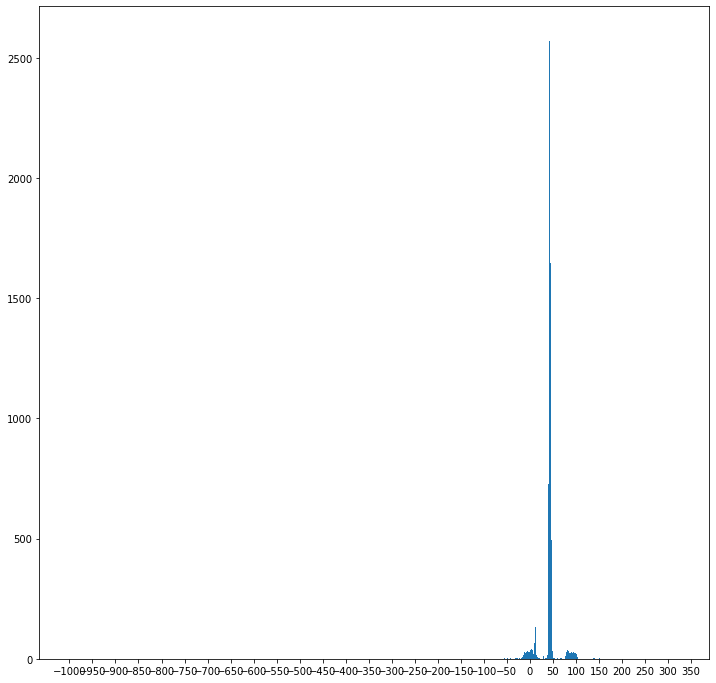

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(-1000,400,50)
plt.xticks(x_ticks)
plt.hist(df['windmill_body_temperature(°C)'],bins=2000)

In [ ]:
j=df['windmill_body_temperature(°C)'].mean()
df['windmill_body_temperature(°C)']=df['windmill_body_temperature(°C)'].fillna(j)

(array([114.,   0.,   1., ...,   1.,   0.,   3.]),
 array([0.00000000e+00, 2.84983239e-01, 5.69966479e-01, ...,
        5.69396512e+02, 5.69681496e+02, 5.69966479e+02]),
 <a list of 2000 Patch objects>)

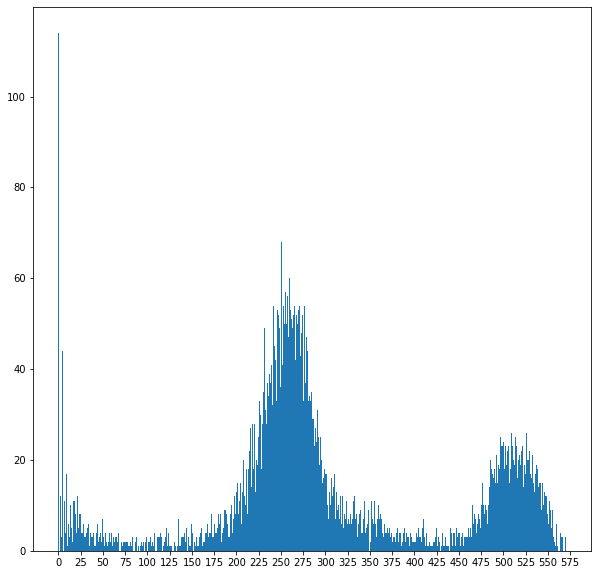

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(0,600,25)
plt.xticks(x_ticks)
plt.hist(df['wind_direction(°)'],bins=2000)

In [ ]:
k=df['wind_direction(°)'].median()
df['wind_direction(°)']=df['wind_direction(°)'].fillna(k)

In [ ]:
df['resistance(ohm)']=df['resistance(ohm)'].replace(-99,np.nan)

In [ ]:
df['resistance(ohm)']=df['resistance(ohm)'].abs()

(array([3., 5., 3., ..., 0., 0., 1.]),
 array([1.45120513e+00, 3.79722049e+00, 6.14323586e+00, ...,
        4.68878990e+03, 4.69113592e+03, 4.69348193e+03]),
 <a list of 2000 Patch objects>)

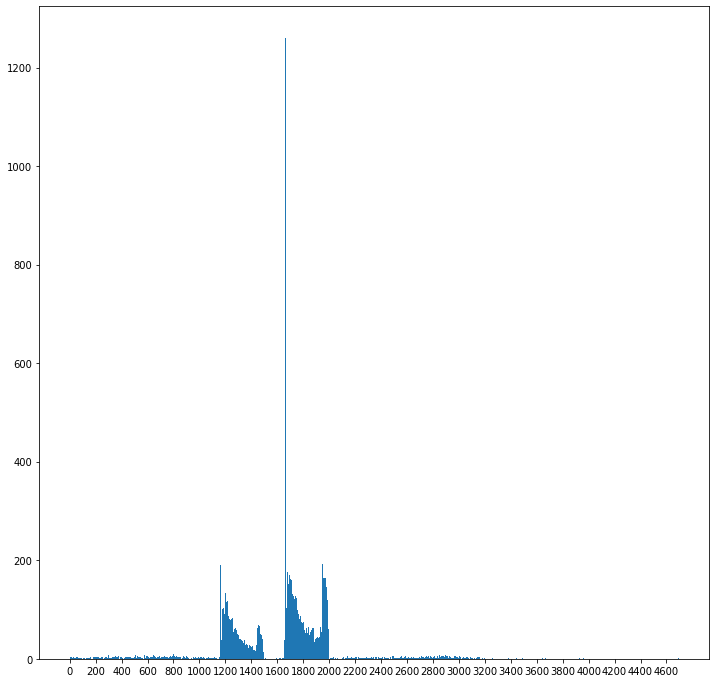

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(0,4700,200)
plt.xticks(x_ticks)
plt.hist(df['resistance(ohm)'],bins=2000)

In [ ]:
l=df['resistance(ohm)'].median()
df['resistance(ohm)']=df['resistance(ohm)'].fillna(l)

In [ ]:
df['rotor_torque(N-m)']=df['rotor_torque(N-m)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-136.73221691, -136.54540917, -136.35860143, ...,  236.50964872,
         236.69645646,  236.8832642 ]),
 <a list of 2000 Patch objects>)

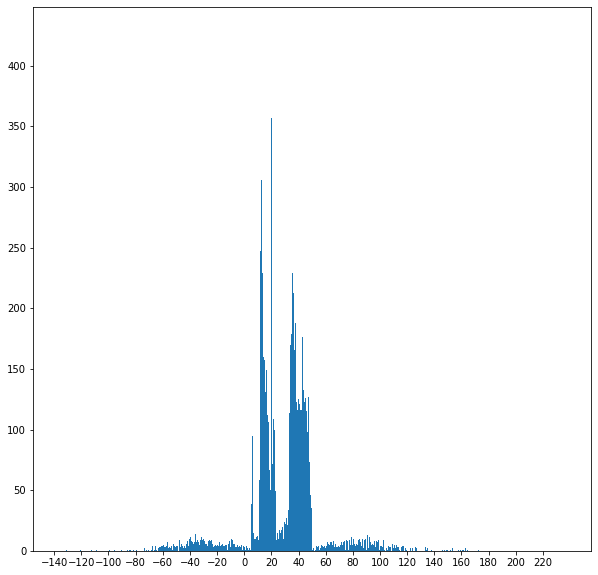

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(-140,240,20)
plt.xticks(x_ticks)
plt.hist(df['rotor_torque(N-m)'],bins=2000)

In [ ]:
m=df['rotor_torque(N-m)'].median()
df['rotor_torque(N-m)']=df['rotor_torque(N-m)'].fillna(m)

In [ ]:
df['turbine_status'].unique()

array(['BA', 'A2', 'ABC', 'AAA', 'BD', 'AC', 'BB', 'BCB', 'B', 'AB', nan,
       'B2', 'BBB', 'A', 'D'], dtype=object)

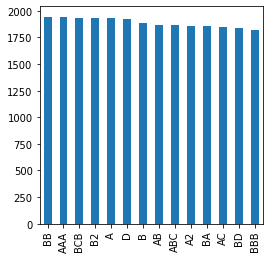

In [ ]:
plt.figure(figsize=(4,4))
df['turbine_status'].value_counts().plot(kind='bar')

In [ ]:
t_s=pd.get_dummies(df['turbine_status'],prefix='t_s')
df=df.join(t_s)
del df['turbine_status']

In [ ]:
df['cloud_level'].unique()

array(['Medium', nan, 'Low', 'Extremely Low'], dtype=object)

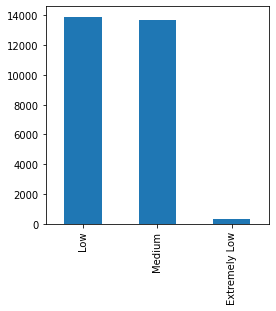

In [ ]:
plt.figure(figsize=(4,4))
df['cloud_level'].value_counts().plot(kind='bar')

In [ ]:
c_l=pd.get_dummies(df['cloud_level'],prefix='c_l')
df=df.join(c_l)
del df['cloud_level']

In [ ]:
df['blade_length(m)']=df['blade_length(m)'].replace(-99,np.nan)

In [ ]:
df['blade_length(m)']=df['blade_length(m)'].abs()

(array([5., 6., 7., ..., 0., 0., 1.]),
 array([5.69254045e-04, 9.67386949e-03, 1.87784849e-02, ...,
        1.81915909e+01, 1.82006955e+01, 1.82098001e+01]),
 <a list of 2000 Patch objects>)

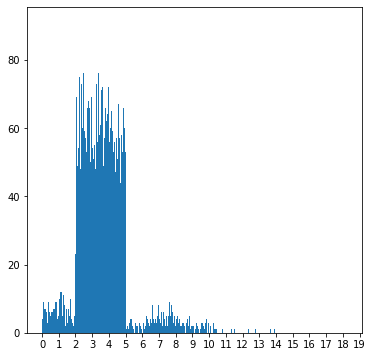

In [ ]:
plt.figure(figsize=(6,6))
x_ticks = np.arange(0,20,1)
plt.xticks(x_ticks)
plt.hist(df['blade_length(m)'],bins=2000)

In [ ]:
n=df['blade_length(m)'].mean()
df['blade_length(m)']=df['blade_length(m)'].fillna(n)

(array([ 1.,  0.,  0., ..., 26., 19., 23.]),
 array([0.200111  , 0.20026093, 0.20041086, ..., 0.4996754 , 0.49982534,
        0.49997527]),
 <a list of 2000 Patch objects>)

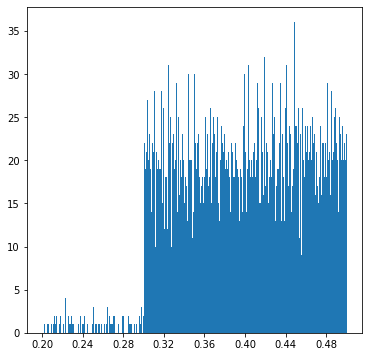

In [ ]:
plt.figure(figsize=(6,6))
x_ticks = np.arange(0,0.6,0.04)
plt.xticks(x_ticks)
plt.hist(df['blade_breadth(m)'],bins=2000)

In [ ]:
df['windmill_height(m)']=df['windmill_height(m)'].abs()

(array([4., 1., 0., ..., 0., 0., 1.]),
 array([2.64926212e-02, 6.56550425e-02, 1.04817464e-01, ...,
        7.82730104e+01, 7.83121729e+01, 7.83513353e+01]),
 <a list of 2000 Patch objects>)

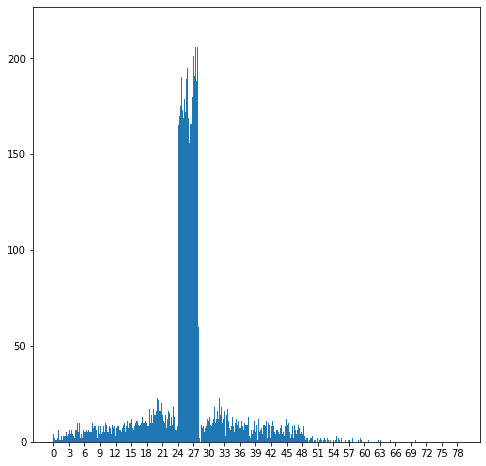

In [ ]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(0,80,3)
plt.xticks(x_ticks)
plt.hist(df['windmill_height(m)'],bins=2000)

In [ ]:
o=df['windmill_height(m)'].mean()
df['windmill_height(m)']=df['windmill_height(m)'].fillna(o)

In [ ]:
print("Number of null values in target variable: ",sum(df['windmill_generated_power(kW/h)'].isnull()))

Number of null values in target variable:  207


Dropping rows with target having null values

In [ ]:
df=df.dropna()

In [ ]:
print("Complete information of the dataset: ")
print()
df.info()

Complete information of the dataset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27993 entries, 0 to 28199
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wind_speed(m/s)                 27993 non-null  float64
 1   atmospheric_temperature(°C)     27993 non-null  float64
 2   shaft_temperature(°C)           27993 non-null  float64
 3   blades_angle(°)                 27993 non-null  float64
 4   gearbox_temperature(°C)         27993 non-null  float64
 5   engine_temperature(°C)          27993 non-null  float64
 6   motor_torque(N-m)               27993 non-null  float64
 7   generator_temperature(°C)       27993 non-null  float64
 8   atmospheric_pressure(Pascal)    27993 non-null  float64
 9   area_temperature(°C)            27993 non-null  float64
 10  windmill_body_temperature(°C)   27993 non-null  float64
 11  wind_direction(°)               27993 non-null  float6

In [ ]:
print("Describing each column: ")
df.describe()

Describing each column: 


,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),year,quarter,month,weekofyear,dayofyear,day,hour,min,is_month_start,is_month_end,t_s_A,t_s_A2,t_s_AAA,t_s_AB,t_s_ABC,t_s_AC,t_s_B,t_s_B2,t_s_BA,t_s_BB,t_s_BBB,t_s_BCB,t_s_BD,t_s_D,c_l_Extremely Low,c_l_Low,c_l_Medium
count,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,2.799300e+04,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000
mean,83.950279,19.206979,42.899077,8.586270,42.377358,42.610355,1710.719565,65.017024,1.225767e+05,32.728987,42.259764,300.343920,1611.758093,28.682692,3.622396,0.397247,25.959790,6.130529,2018.811846,2.376308,6.210445,25.111349,173.210731,15.512485,11.592934,28.039831,0.034259,0.035187,0.068374,0.065731,0.068767,0.066267,0.066267,0.065766,0.066802,0.068517,0.065552,0.068946,0.064516,0.068589,0.065373,0.068124,0.010681,0.493838,0.485764
std,59.381152,8.853386,18.702837,22.509923,41.421236,6.130610,826.649495,19.806222,1.439286e+05,7.703850,18.758674,121.962942,416.753523,26.640744,1.459763,0.061210,7.439575,2.697520,0.390842,1.078512,3.455197,15.010747,105.523366,8.760096,6.915927,17.056113,0.181896,0.184256,0.252392,0.247815,0.253062,0.248752,0.248752,0.247878,0.249684,0.252636,0.247502,0.253366,0.245674,0.252758,0.247188,0.251963,0.102798,0.499971,0.499806
min,1.768248,-53.795813,-93.086236,-146.259543,-244.974098,3.167151,500.000000,33.893779,2.109124e+02,-30.000000,-999.000000,0.000000,1.451205,-136.732217,0.000569,0.200111,0.026493,0.962305,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.803877,14.520474,41.848150,-0.872693,40.700299,41.912129,870.566463,41.197711,1.744063e+04,27.311681,42.265411,246.781153,1290.928068,14.393914,2.798774,0.347345,24.469152,4.059505,2019.000000,1.000000,3.000000,12.000000,80.000000,8.000000,6.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,93.625319,19.211613,43.754571,0.420640,43.219066,43.525297,2031.849540,70.721663,1.127892e+05,32.592784,42.493362,271.427656,1682.815356,33.509417,3.622661,0.398587,25.963675,5.764710,2019.000000,2.000000,6.000000,25.000000,171.000000,15.000000,12.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,95.582789,22.574933,45.672663,5.366545,45.874762,45.168744,2460.920954,78.920508,1.286415e+05,38.213333,44.323545,331.623967,1828.536126,41.324371,4.162534,0.449440,27.450727,7.947195,2019.000000,3.000000,9.000000,36.000000,247.000000,23.000000,18.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,

Checking samples again after preprocessing....

Looks like we got we desired!!  :)

In [ ]:
df.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),year,quarter,month,weekofyear,dayofyear,day,hour,min,is_month_start,is_month_end,t_s_A,t_s_A2,t_s_AAA,t_s_AB,t_s_ABC,t_s_AC,t_s_B,t_s_B2,t_s_BA,t_s_BB,t_s_BBB,t_s_BCB,t_s_BD,t_s_D,c_l_Extremely Low,c_l_Low,c_l_Medium
0,94.820023,19.211613,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,42.265411,239.836388,2730.310605,42.084666,2.217542,0.314065,24.281689,6.766521,2019,3,8,31,216,4,14,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,241.832734,27.764785,43.754571,0.420640,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,42.265411,337.944723,1780.207200,107.888643,4.210346,0.448494,27.262139,5.966275,2018,4,11,45,309,5,10,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,95.484724,19.211613,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,2.719475,0.302321,27.366127,2.874342,2019,3,9,37,257,14,14,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,238.819424,19.211613,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,4.857385,0.367140,24.287767,14.851089,2018,4,12,52,359,25,15,33,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10.722890,19.211613,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,42.265411,259.274601,1177.516152,13.387289,3.622661,0.453374,27.971650,3.519074,2019,2,5,18,124,4,3,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print("New dataset shape we are going to work on: ",df.shape)

New dataset shape we are going to work on:  (27993, 45)


In [ ]:
y=df['windmill_generated_power(kW/h)']
del df['windmill_generated_power(kW/h)']

Let's run a trial test whether our dataset is set to go on?????

Dont forget to shuffle before moving forward!

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(df,y,test_size=0.2,random_state=42)
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

**CatBoost, XGBoost and LGBM**

Why to use these algorithms? 

Because

1. They are like trees with each value being updated with the help and correction of previous nodes.

2. Mostly in competitive hackathons, it has become a trend to just close your eyes and shoot these at first, lol, but yeah I am being honest here.

Be careful with metrics you choose as per your problem statement!

Also, here I went with manual search for hyper parameter tuning taking help from various sites and got good results pretty quick. Try GridSearch or RandomSearch for "little" more better results.

In [ ]:
trial_cb=cb.CatBoostRegressor(eval_metric='R2',depth=9,iterations=1000)
trial_xgb=xgb.XGBRegressor(max_depth=9,learning_rate=0.01,n_estimators=1000,objective='reg:squarederror')
trial_lgbm=lgbm.LGBMRegressor(max_depth=9,learning_rate=0.01,n_estimators=1000,subsample=0.8)

Wondering why used VotingRegressor after already using the above three algos?

VR generally takes average of the algos mentioned within it, so hy not to give it a try. (It gives me intution like you have three powerful guns and you just went ahead with just one gun in a battle when you could have taken three together?)

In [ ]:
trial=VotingRegressor(estimators=[('cb',trial_cb),('xgb',trial_xgb),('lgbm',trial_lgbm)])

In [ ]:
trial.fit(xtrain,ytrain)

Learning rate set to 0.067877
0:	learn: 0.1046725	total: 109ms	remaining: 1m 48s
1:	learn: 0.1897322	total: 152ms	remaining: 1m 16s
2:	learn: 0.2720846	total: 201ms	remaining: 1m 6s
3:	learn: 0.3491835	total: 245ms	remaining: 1m
4:	learn: 0.4151413	total: 288ms	remaining: 57.3s
5:	learn: 0.4759210	total: 332ms	remaining: 54.9s
6:	learn: 0.5289564	total: 378ms	remaining: 53.6s
7:	learn: 0.5768942	total: 429ms	remaining: 53.2s
8:	learn: 0.6144642	total: 471ms	remaining: 51.9s
9:	learn: 0.6503681	total: 514ms	remaining: 50.9s
10:	learn: 0.6821977	total: 568ms	remaining: 51.1s
11:	learn: 0.7122031	total: 614ms	remaining: 50.5s
12:	learn: 0.7377640	total: 662ms	remaining: 50.3s
13:	learn: 0.7590480	total: 705ms	remaining: 49.6s
14:	learn: 0.7792363	total: 748ms	remaining: 49.1s
15:	learn: 0.7957013	total: 792ms	remaining: 48.7s
16:	learn: 0.8121126	total: 832ms	remaining: 48.1s
17:	learn: 0.8256692	total: 878ms	remaining: 47.9s
18:	learn: 0.8379563	total: 917ms	remaining: 47.3s
19:	learn: 0

VotingRegressor(estimators=[('cb',
                             <catboost.core.CatBoostRegressor object at 0x7f9ccf66d310>),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.01, max_delta_step=0,
                                          max_depth=9, min_child_weight=1,
                                          missing=None, n_estimators=1000,
                                          n_jobs=1, nthread=Non...
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
         

In [ ]:
predy=trial.predict(xtest)
predy

array([4.19080007, 7.44743761, 6.24691952, ..., 8.29607793, 6.9866298 ,
       3.27151455])

In [ ]:
from sklearn.metrics import r2_score
print("R2 score: ",r2_score(ytest,predy))

R2 score:  0.9689086250302107


Wohoo!!!!

That nice score I would say. Done with training, lets apply same preprocessing on test dataset and then check our score after submission.

In [ ]:
dff=pd.read_csv('/content/drive/MyDrive/HackerEarth/A Fine Windy Day/dataset/test.csv')
dff.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,NaN,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [ ]:
del dff['tracking_id']
dff.shape

(12086, 20)

In [ ]:
dff['date']=pd.to_datetime(dff['datetime'])

In [ ]:
dff['year']=dff['date'].dt.year
dff['quarter']=pd.DatetimeIndex(dff['datetime']).quarter
dff['month']=dff['date'].dt.month
dff['weekofyear']=dff['date'].dt.isocalendar().week
dff['dayofyear']=pd.DatetimeIndex(dff['datetime']).dayofyear
dff['day']=dff['date'].dt.day
dff['hour']=dff['date'].dt.hour
dff['min']=dff['date'].dt.minute
dff['is_month_start']=pd.DatetimeIndex(dff['datetime']).is_month_start.astype(int)
dff['is_month_end']=pd.DatetimeIndex(dff['datetime']).is_month_end.astype(int)

In [ ]:
del dff['date']
del dff['datetime']

In [ ]:
dff['wind_speed(m/s)']=dff['wind_speed(m/s)'].abs()

(array([1., 0., 0., ..., 0., 0., 2.]),
 array([2.25434532e-01, 4.88087115e-01, 7.50739697e-01, ...,
        5.25005295e+02, 5.25267947e+02, 5.25530600e+02]),
 <a list of 2000 Patch objects>)

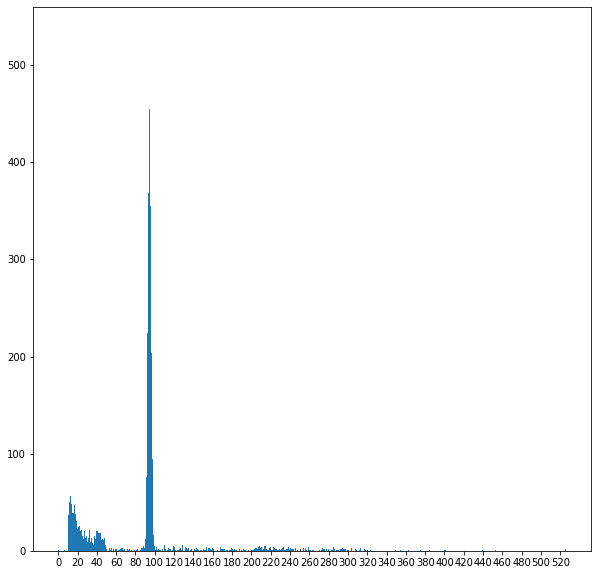

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(0, 540,20)
plt.xticks(x_ticks)
plt.hist(dff['wind_speed(m/s)'],bins=2000)

In [ ]:
dff['wind_speed(m/s)']=dff['wind_speed(m/s)'].fillna(a)

In [ ]:
dff['atmospheric_temperature(°C)']=dff['atmospheric_temperature(°C)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-41.22922275, -41.16838702, -41.1075513 , ...,  80.32056018,
         80.38139591,  80.44223164]),
 <a list of 2000 Patch objects>)

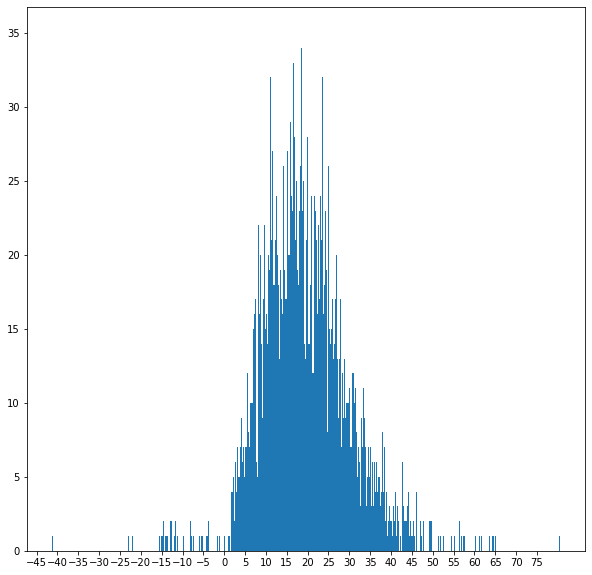

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(-45,80,5)
plt.xticks(x_ticks)
plt.hist(dff['atmospheric_temperature(°C)'],bins=2000)

In [ ]:
dff['atmospheric_temperature(°C)']=dff['atmospheric_temperature(°C)'].fillna(b)

In [ ]:
dff['shaft_temperature(°C)']=dff['shaft_temperature(°C)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-62.25376797, -62.1309911 , -62.00821422, ..., 183.05442894,
        183.17720582, 183.29998269]),
 <a list of 2000 Patch objects>)

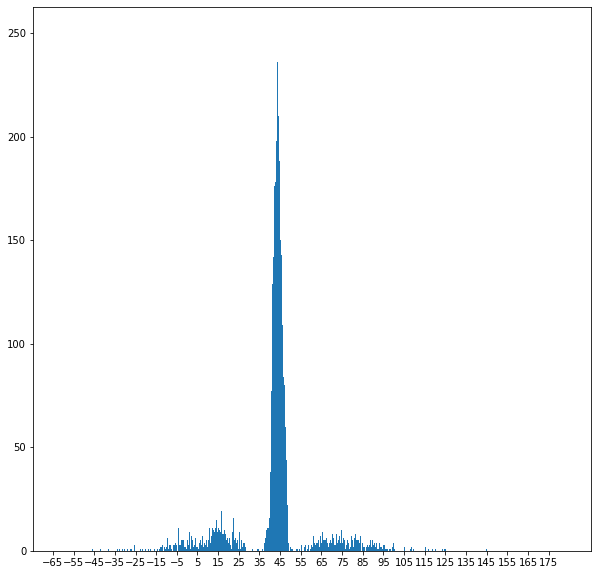

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(-65,185,10)
plt.xticks(x_ticks)
plt.hist(dff['shaft_temperature(°C)'],bins=2000)

In [ ]:
dff['shaft_temperature(°C)']=dff['shaft_temperature(°C)'].fillna(c)

In [ ]:
dff['blades_angle(°)']=dff['blades_angle(°)'].replace(-99,np.nan)

(array([3., 1., 2., ..., 0., 0., 1.]),
 array([-74.53500709, -74.41271568, -74.29042426, ..., 169.80324005,
        169.92553146, 170.04782288]),
 <a list of 2000 Patch objects>)

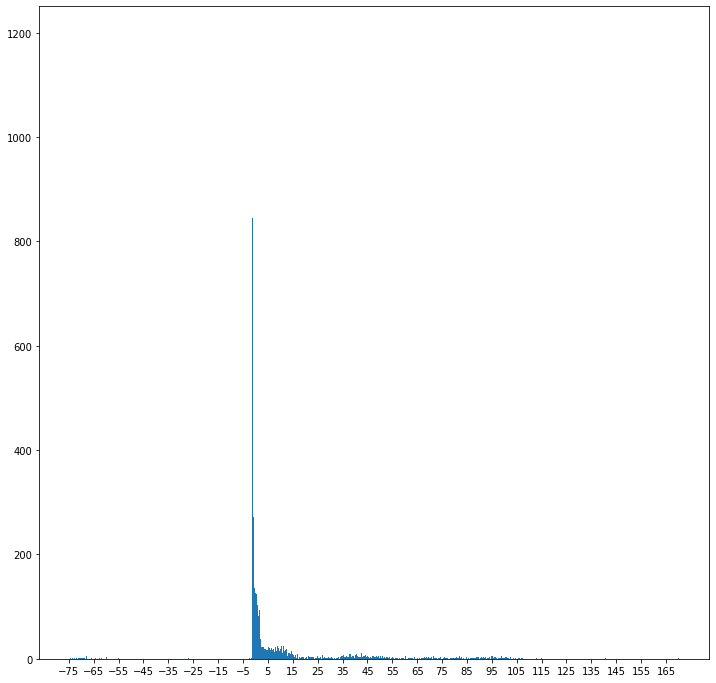

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(-75,170,10)
plt.xticks(x_ticks)
plt.hist(dff['blades_angle(°)'],bins=2000)

In [ ]:
dff['blades_angle(°)']=dff['blades_angle(°)'].fillna(d)

In [ ]:
dff['gearbox_temperature(°C)']=dff['gearbox_temperature(°C)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-185.86088292, -185.48645248, -185.11202204, ...,  562.25113912,
         562.62556956,  563.        ]),
 <a list of 2000 Patch objects>)

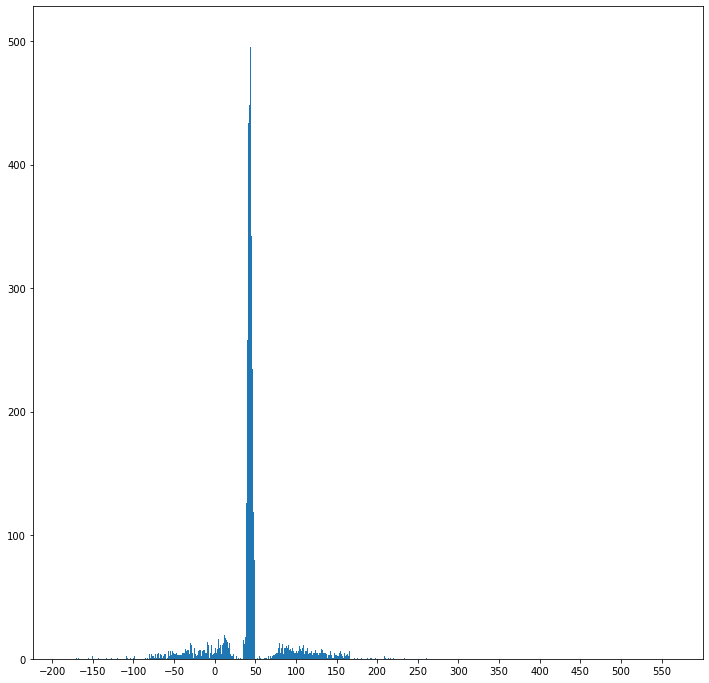

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(-200,560,50)
plt.xticks(x_ticks)
plt.hist(dff['gearbox_temperature(°C)'],bins=2000)

In [ ]:
dff['gearbox_temperature(°C)']=dff['gearbox_temperature(°C)'].fillna(e)

(array([1., 0., 0., ..., 2., 1., 2.]),
 array([-5.        , -4.97257053, -4.94514106, ..., 49.80408561,
        49.83151508, 49.85894455]),
 <a list of 2000 Patch objects>)

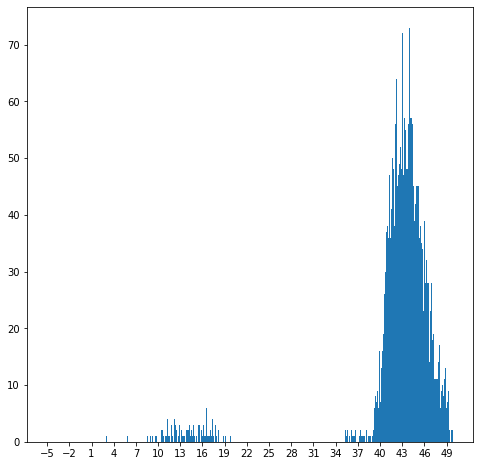

In [ ]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(-5,50,3)
plt.xticks(x_ticks)
plt.hist(dff['engine_temperature(°C)'],bins=2000)

In [ ]:
dff['engine_temperature(°C)']=dff['engine_temperature(°C)'].fillna(f)

(array([165.,  27.,  18., ...,   0.,   0.,   1.]),
 array([ 500.        ,  501.24850688,  502.49701377, ..., 2994.51675548,
        2995.76526236, 2997.01376925]),
 <a list of 2000 Patch objects>)

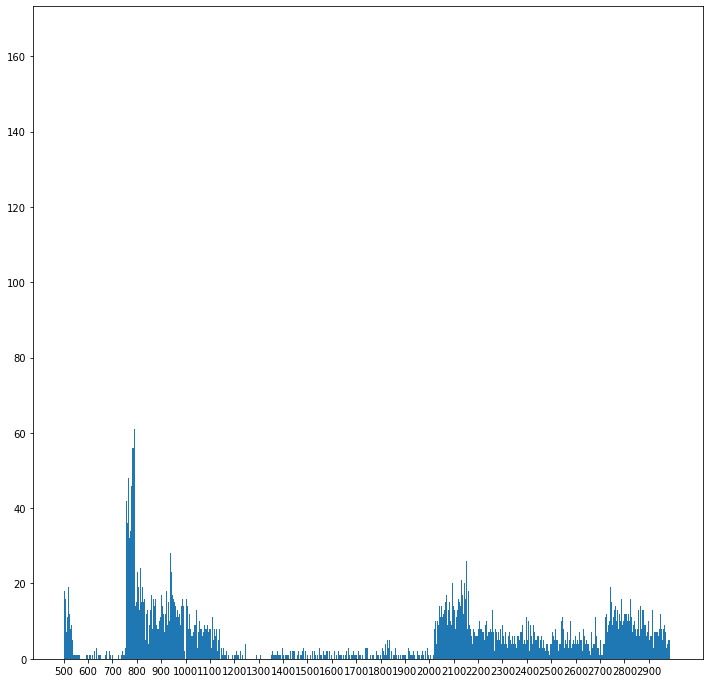

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(500,3000,100)
plt.xticks(x_ticks)
plt.hist(dff['motor_torque(N-m)'],bins=2000)

In [ ]:
dff['motor_torque(N-m)']=dff['motor_torque(N-m)'].fillna(g)

(array([1., 0., 0., ..., 0., 0., 2.]),
 array([30.        , 30.0347858 , 30.0695716 , ..., 99.50202782,
        99.53681362, 99.57159942]),
 <a list of 2000 Patch objects>)

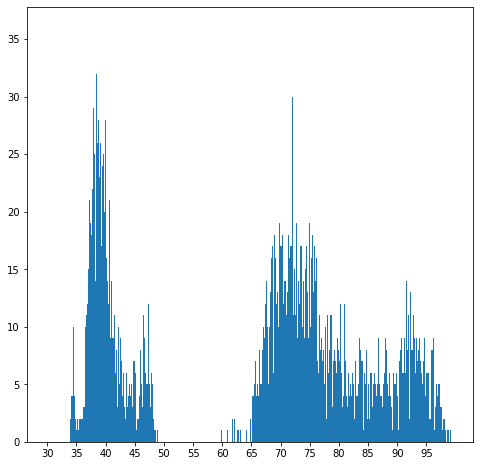

In [ ]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(30,100,5)
plt.xticks(x_ticks)
plt.hist(dff['generator_temperature(°C)'],bins=2000)

In [ ]:
dff['generator_temperature(°C)']=dff['generator_temperature(°C)'].fillna(h)

In [ ]:
dff['atmospheric_pressure(Pascal)']=dff['atmospheric_pressure(Pascal)'].abs()

(array([1., 1., 0., ..., 0., 0., 1.]),
 array([4.99663821e+01, 6.53570749e+02, 1.25717512e+03, ...,
        1.20605149e+06, 1.20665510e+06, 1.20725870e+06]),
 <a list of 2000 Patch objects>)

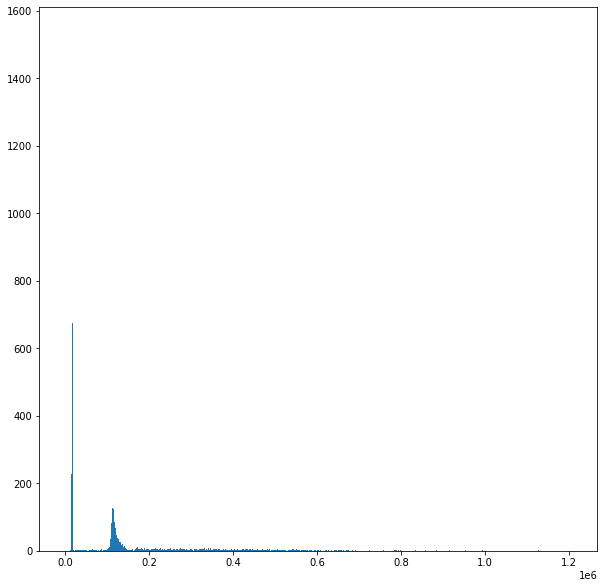

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(dff['atmospheric_pressure(Pascal)'],bins=2000)

In [ ]:
dff['atmospheric_pressure(Pascal)']=dff['atmospheric_pressure(Pascal)'].fillna(i)

(array([11.,  0.,  0., ...,  0.,  0.,  1.]),
 array([-30.        , -29.95803615, -29.9160723 , ...,  53.84376982,
         53.88573366,  53.92769751]),
 <a list of 2000 Patch objects>)

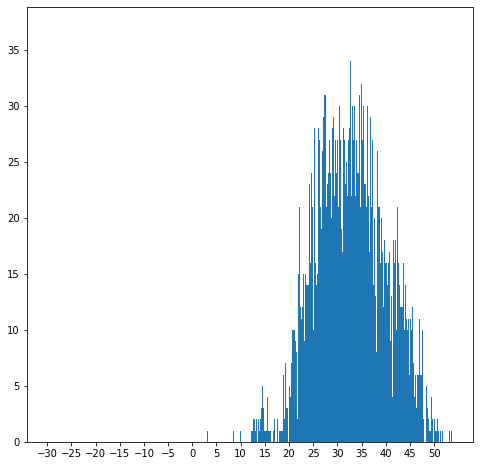

In [ ]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(-30,55,5)
plt.xticks(x_ticks)
plt.hist(dff['area_temperature(°C)'],bins=2000)

In [ ]:
dff['area_temperature(°C)']=dff['area_temperature(°C)'].fillna(df['area_temperature(°C)'].mean())

In [ ]:
dff['windmill_body_temperature(°C)']=dff['windmill_body_temperature(°C)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-85.05625798, -84.91773998, -84.77922198, ..., 191.70271136,
        191.84122936, 191.97974736]),
 <a list of 2000 Patch objects>)

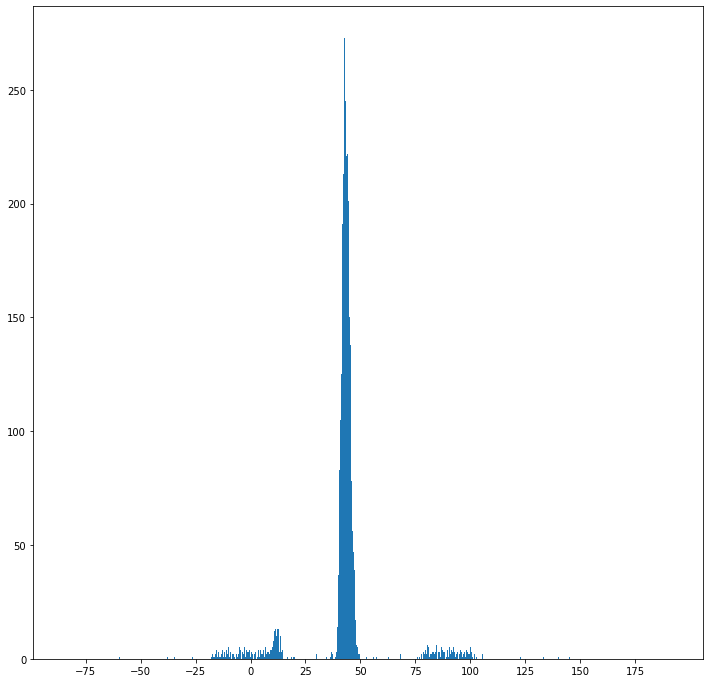

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(-100,200,25)
plt.xticks(x_ticks)
plt.hist(dff['windmill_body_temperature(°C)'],bins=2000)

In [ ]:
dff['windmill_body_temperature(°C)']=dff['windmill_body_temperature(°C)'].fillna(j)

(array([42.,  0.,  0., ...,  0.,  1.,  1.]),
 array([0.00000000e+00, 2.85428876e-01, 5.70857751e-01, ...,
        5.70286893e+02, 5.70572322e+02, 5.70857751e+02]),
 <a list of 2000 Patch objects>)

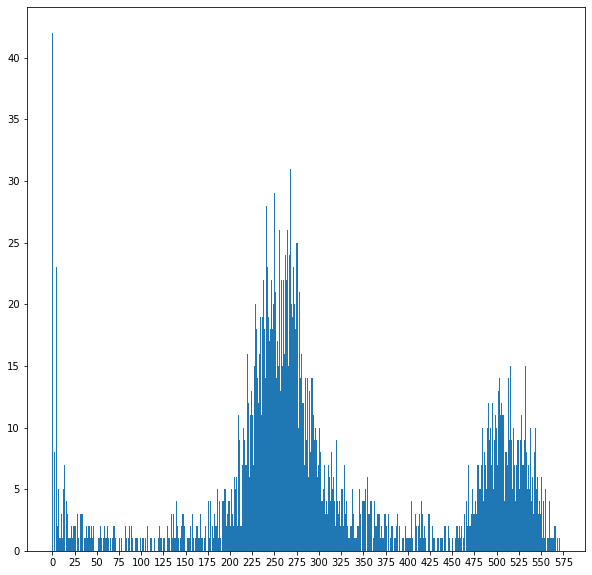

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(0,600,25)
plt.xticks(x_ticks)
plt.hist(dff['wind_direction(°)'],bins=2000)

In [ ]:
dff['wind_direction(°)']=dff['wind_direction(°)'].fillna(k)

In [ ]:
dff['resistance(ohm)']=dff['resistance(ohm)'].replace(-99,np.nan)

In [ ]:
dff['resistance(ohm)']=dff['resistance(ohm)'].abs()

(array([1., 0., 1., ..., 0., 0., 1.]),
 array([6.29485088e-01, 2.68226835e+00, 4.73505160e+00, ...,
        4.10209043e+03, 4.10414322e+03, 4.10619600e+03]),
 <a list of 2000 Patch objects>)

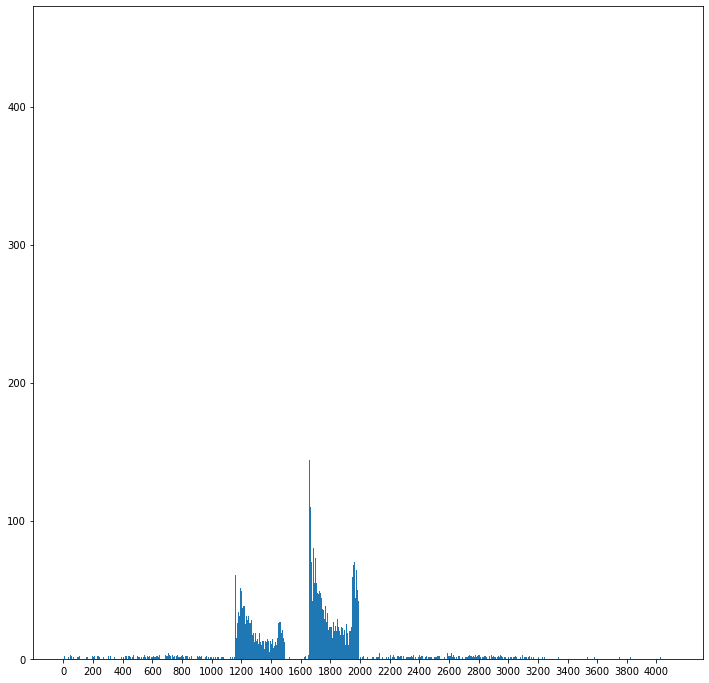

In [ ]:
plt.figure(figsize=(12,12))
x_ticks = np.arange(0,4200,200)
plt.xticks(x_ticks)
plt.hist(dff['resistance(ohm)'],bins=2000)

In [ ]:
dff['resistance(ohm)']=dff['resistance(ohm)'].fillna(l)

In [ ]:
dff['rotor_torque(N-m)']=dff['rotor_torque(N-m)'].replace(-99,np.nan)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-182.16961301, -181.97189816, -181.77418332, ...,  212.86464652,
         213.06236136,  213.2600762 ]),
 <a list of 2000 Patch objects>)

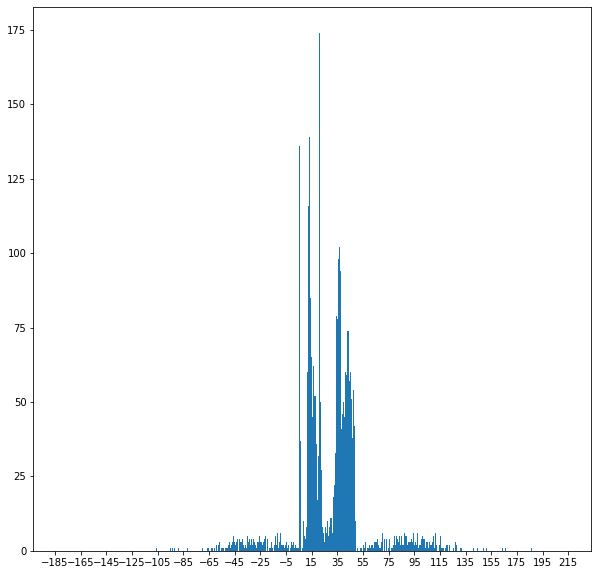

In [ ]:
plt.figure(figsize=(10,10))
x_ticks = np.arange(-185,220,20)
plt.xticks(x_ticks)
plt.hist(dff['rotor_torque(N-m)'],bins=2000)

In [ ]:
dff['rotor_torque(N-m)']=dff['rotor_torque(N-m)'].fillna(m)

In [ ]:
dff['turbine_status'].unique()

array(['BA', 'A', 'B2', 'BBB', 'BB', 'AAA', 'BCB', 'B', nan, 'D', 'ABC',
       'AB', 'BD', 'A2', 'AC'], dtype=object)

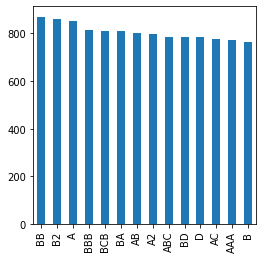

In [ ]:
plt.figure(figsize=(4,4))
dff['turbine_status'].value_counts().plot(kind='bar')

In [ ]:
t_s=pd.get_dummies(dff['turbine_status'],prefix='t_s')
dff=dff.join(t_s)
del dff['turbine_status']

In [ ]:
dff['cloud_level'].unique()

array(['Medium', 'Low', nan, 'Extremely Low'], dtype=object)

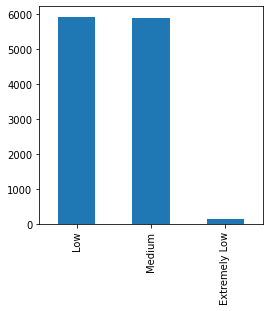

In [ ]:
plt.figure(figsize=(4,4))
dff['cloud_level'].value_counts().plot(kind='bar')

In [ ]:
c_l=pd.get_dummies(dff['cloud_level'],prefix='c_l')
dff=dff.join(c_l)
del dff['cloud_level']

In [ ]:
dff['blade_length(m)']=dff['blade_length(m)'].replace(-99,np.nan)

In [ ]:
dff['blade_length(m)']=dff['blade_length(m)'].abs()

(array([ 3.,  4., 10., ...,  0.,  0.,  1.]),
 array([5.26149497e-03, 1.41828324e-02, 2.31041698e-02, ...,
        1.78300937e+01, 1.78390150e+01, 1.78479364e+01]),
 <a list of 2000 Patch objects>)

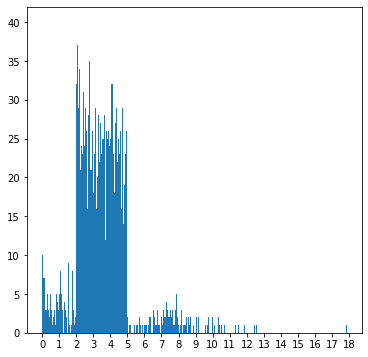

In [ ]:
plt.figure(figsize=(6,6))
x_ticks = np.arange(0,20,1)
plt.xticks(x_ticks)
plt.hist(dff['blade_length(m)'],bins=2000)

In [ ]:
dff['blade_length(m)']=dff['blade_length(m)'].fillna(n)

(array([ 2.,  0.,  0., ..., 10.,  8.,  8.]),
 array([0.20000868, 0.20015867, 0.20030866, ..., 0.49968547, 0.49983546,
        0.49998545]),
 <a list of 2000 Patch objects>)

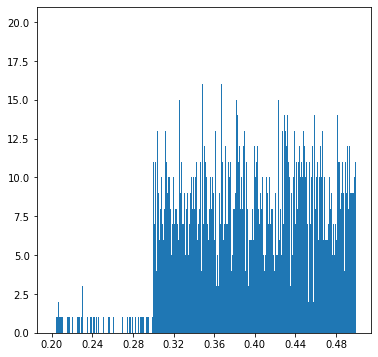

In [ ]:
plt.figure(figsize=(6,6))
x_ticks = np.arange(0,0.6,0.04)
plt.xticks(x_ticks)
plt.hist(dff['blade_breadth(m)'],bins=2000)

In [ ]:
dff['windmill_height(m)']=dff['windmill_height(m)'].abs()

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([3.15230258e-02, 7.03097490e-02, 1.09096472e-01, ...,
        7.75273960e+01, 7.75661827e+01, 7.76049694e+01]),
 <a list of 2000 Patch objects>)

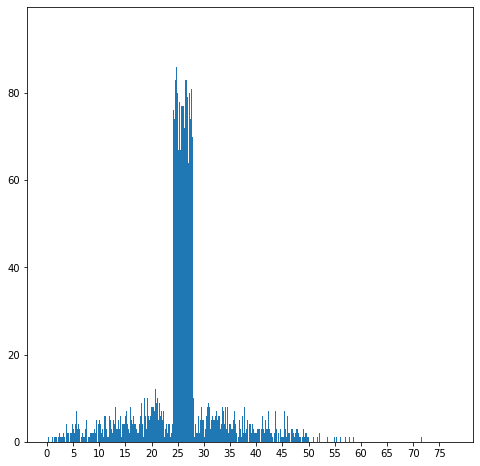

In [ ]:
plt.figure(figsize=(8,8))
x_ticks = np.arange(0,80,5)
plt.xticks(x_ticks)
plt.hist(dff['windmill_height(m)'],bins=2000)

In [ ]:
dff['windmill_height(m)']=dff['windmill_height(m)'].fillna(o)

In [ ]:
dff.shape

(12086, 44)

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wind_speed(m/s)                12086 non-null  float64
 1   atmospheric_temperature(°C)    12086 non-null  float64
 2   shaft_temperature(°C)          12086 non-null  float64
 3   blades_angle(°)                12086 non-null  float64
 4   gearbox_temperature(°C)        12086 non-null  float64
 5   engine_temperature(°C)         12086 non-null  float64
 6   motor_torque(N-m)              12086 non-null  float64
 7   generator_temperature(°C)      12086 non-null  float64
 8   atmospheric_pressure(Pascal)   12086 non-null  float64
 9   area_temperature(°C)           12086 non-null  float64
 10  windmill_body_temperature(°C)  12086 non-null  float64
 11  wind_direction(°)              12086 non-null  float64
 12  resistance(ohm)                12086 non-null 

In [ ]:
dff.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),year,quarter,month,weekofyear,dayofyear,day,hour,min,is_month_start,is_month_end,t_s_A,t_s_A2,t_s_AAA,t_s_AB,t_s_ABC,t_s_AC,t_s_B,t_s_B2,t_s_BA,t_s_BB,t_s_BBB,t_s_BCB,t_s_BD,t_s_D,c_l_Extremely Low,c_l_Low,c_l_Medium
count,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,1.208600e+04,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000
mean,83.935157,19.228220,42.795285,8.634406,41.827954,42.605119,1717.630236,65.240166,1.229801e+05,32.796163,42.401448,301.772737,1618.199896,29.140055,3.611090,0.397527,26.019085,2018.807711,2.383005,6.231011,25.209499,173.854625,15.534006,11.581830,27.957802,0.036819,0.035247,0.070495,0.065861,0.063958,0.066523,0.065117,0.064372,0.063131,0.071074,0.066937,0.072067,0.067268,0.067102,0.065117,0.065034,0.011253,0.490816,0.487589
std,59.527435,8.981755,18.458300,22.392256,39.939170,6.213866,829.485686,19.864339,1.438731e+05,7.671602,15.429588,122.189083,414.226066,26.740194,1.480082,0.061661,7.443401,0.394115,1.083753,3.472702,15.096078,106.077748,8.750963,6.948838,17.142901,0.188326,0.184412,0.255990,0.248050,0.244689,0.249205,0.246742,0.245425,0.243208,0.256959,0.249923,0.258609,0.250496,0.250210,0.246742,0.246596,0.105485,0.499936,0.499867
min,0.225435,-41.229223,-62.253768,-74.535007,-185.860883,-5.000000,500.000000,30.000000,4.996638e+01,-30.000000,-85.056258,0.000000,0.629485,-182.169613,0.005261,0.200009,0.031523,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.229771,14.503546,41.843454,-0.884745,40.644685,41.926556,874.600120,41.285062,1.745860e+04,27.407281,42.265411,247.242960,1298.056975,14.434604,2.768459,0.346909,24.490326,2019.000000,1.000000,3.000000,12.000000,80.000000,8.000000,6.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,93.625319,19.211613,43.754571,0.420640,43.219696,43.551829,2031.849540,70.793474,1.127044e+05,32.659540,42.530522,271.427656,1682.815356,33.509417,3.622661,0.399637,25.963675,2019.000000,2.000000,6.000000,25.000000,171.500000,15.000000,12.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,95.551768,22.744798,45.755861,6.028020,45.840069,45.227942,2479.582123,79.427893,1.288337e+05,38.302580,44.355803,335.347247,1837.302026,41.759021,4.162360,0.450488,27.458013,2019.000000,3.000000,9.000000,36.000000,248.000000,23.000000,18.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,525.530600,80.442232,183.299983,170.047823,563.000000,49.858945,2997.013769,99.571599,1.207259e+06,53.927698,191.979747,570.857751,4106.196001,213.260076,17.847936,0.499985,77.604969,2019.000000,4.000000,12.000000,52.000000,365.000000,31.000000,23.000000,53.000000,1.000000

In [ ]:
dff.isnull().values.any()

False

In [ ]:
ss=StandardScaler()
df=ss.fit_transform(df)
dff=ss.transform(dff)

Here we go with our final models to be trained on training dataset.

In [ ]:
model_cb=cb.CatBoostRegressor(eval_metric='R2',depth=9,iterations=60000)
model_xgb=xgb.XGBRegressor(max_depth=9,learning_rate=0.05,n_estimators=4000,objective='reg:squarederror')
model_lgbm=lgbm.LGBMRegressor(max_depth=9,learning_rate=0.05,n_estimators=4000,subsample=0.8)

In [ ]:
model=VotingRegressor(estimators=[('cb',model_cb),('xgb',model_xgb),('lgbm',model_lgbm)])

In [ ]:
model.fit(df,y)

Streaming output truncated to the last 5000 lines.
55000:	learn: 0.9982631	total: 41m 19s	remaining: 3m 45s
55001:	learn: 0.9982632	total: 41m 19s	remaining: 3m 45s
55002:	learn: 0.9982633	total: 41m 19s	remaining: 3m 45s
55003:	learn: 0.9982633	total: 41m 19s	remaining: 3m 45s
55004:	learn: 0.9982634	total: 41m 19s	remaining: 3m 45s
55005:	learn: 0.9982635	total: 41m 19s	remaining: 3m 45s
55006:	learn: 0.9982635	total: 41m 19s	remaining: 3m 45s
55007:	learn: 0.9982636	total: 41m 19s	remaining: 3m 45s
55008:	learn: 0.9982637	total: 41m 19s	remaining: 3m 45s
55009:	learn: 0.9982638	total: 41m 19s	remaining: 3m 44s
55010:	learn: 0.9982638	total: 41m 19s	remaining: 3m 44s
55011:	learn: 0.9982639	total: 41m 20s	remaining: 3m 44s
55012:	learn: 0.9982640	total: 41m 20s	remaining: 3m 44s
55013:	learn: 0.9982640	total: 41m 20s	remaining: 3m 44s
55014:	learn: 0.9982641	total: 41m 20s	remaining: 3m 44s
55015:	learn: 0.9982641	total: 41m 20s	remaining: 3m 44s
55016:	learn: 0.9982642	total: 41m 20

VotingRegressor(estimators=[('cb',
                             <catboost.core.CatBoostRegressor object at 0x7f9cb0343d50>),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.05, max_delta_step=0,
                                          max_depth=9, min_child_weight=1,
                                          missing=None, n_estimators=4000,
                                          n_jobs=1, nthread=Non...
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
         

In [ ]:
ypred=model.predict(dff)
print(ypred)

[ 2.42641263  2.40846606  3.43877343 ...  5.04060458  5.51401527
 10.63459721]


In [ ]:
ypred=pd.DataFrame(ypred,columns=['windmill_generated_power(kW/h)'])

Lets download and check out standing in leaderboard.

In [ ]:
ypred.to_csv('pred.csv')

In [ ]:
from google.colab import files
files.download('pred.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Got 10th rank among 1700 participants. 

Not bad I guess. See yaa soon!